In [4]:
# import data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

#import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#import stats/regression packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [5]:
df = pd.read_stata("/Users/jmaller/Desktop/ECON628-01-rjmaller/datasets/my_data/replication_data_village_incident.dta")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15600 entries, 0 to 15599
Data columns (total 22 columns):
province           15600 non-null object
municipality       15600 non-null object
barangay           15600 non-null float32
year               15600 non-null float32
month              15600 non-null float32
treat              15600 non-null float32
pop00              15600 non-null float32
streetpattern      15600 non-null float32
power              15600 non-null float32
comm_waterworks    15600 non-null float32
hospital           15600 non-null float32
clinic             15600 non-null float32
acc_natl_hwy       15600 non-null float32
incidents          15600 non-null float64
treat_dist_3       15600 non-null float64
treat_dist_5       15600 non-null float64
treat_dist_7       15600 non-null float64
control_dist_3     15600 non-null float64
control_dist_5     15600 non-null float64
control_dist_7     15600 non-null float64
totcas             15600 non-null float64
_merge     

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barangay,15600.0,65.500000,37.524776,1.0,33.00,65.5,98.00,130.0
year,15600.0,2005.453125,2.872634,2001.0,2003.00,2005.5,2008.00,2010.0
month,15600.0,6.500000,3.452163,1.0,3.75,6.5,9.25,12.0
treat,15600.0,0.500000,0.500016,0.0,0.00,0.5,1.00,1.0
pop00,15600.0,1446.995850,1262.891602,183.0,659.00,1137.5,1757.00,10015.0
streetpattern,15600.0,0.269231,0.443581,0.0,0.00,0.0,1.00,1.0
power,15600.0,0.607692,0.488285,0.0,0.00,1.0,1.00,1.0
comm_waterworks,15600.0,0.161538,0.368056,0.0,0.00,0.0,0.00,1.0
hospital,15600.0,0.038462,0.192296,0.0,0.00,0.0,0.00,1.0
clinic,15600.0,0.476923,0.499511,0.0,0.00,0.0,1.00,1.0


In [8]:
#summary table showing mean number of incidents and mean number of total casualties for treatment and control groups
df.groupby(['treat'], sort=True)[['incidents', 'totcas']].mean().sort_values(by=['incidents'], ascending=False).reset_index()

,treat,incidents,totcas
0,0.0,0.006538,0.001154
1,1.0,0.006538,0.003718


In [9]:
#balancing table showing mean value of control variables for treatment and control groups
df.groupby(['treat'], sort=True)[['pop00', 'streetpattern', 'power', 'comm_waterworks', 'hospital', 'clinic', 'acc_natl_hwy']].mean().sort_values(by=['pop00'], ascending=False).reset_index()
    

,treat,pop00,streetpattern,power,comm_waterworks,hospital,clinic,acc_natl_hwy
0,1.0,1474.584595,0.215385,0.553846,0.169231,0.030769,0.461538,0.476923
1,0.0,1419.492310,0.323077,0.661538,0.153846,0.046154,0.492308,0.523077


NameError: name 'df' is not defined

In [10]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

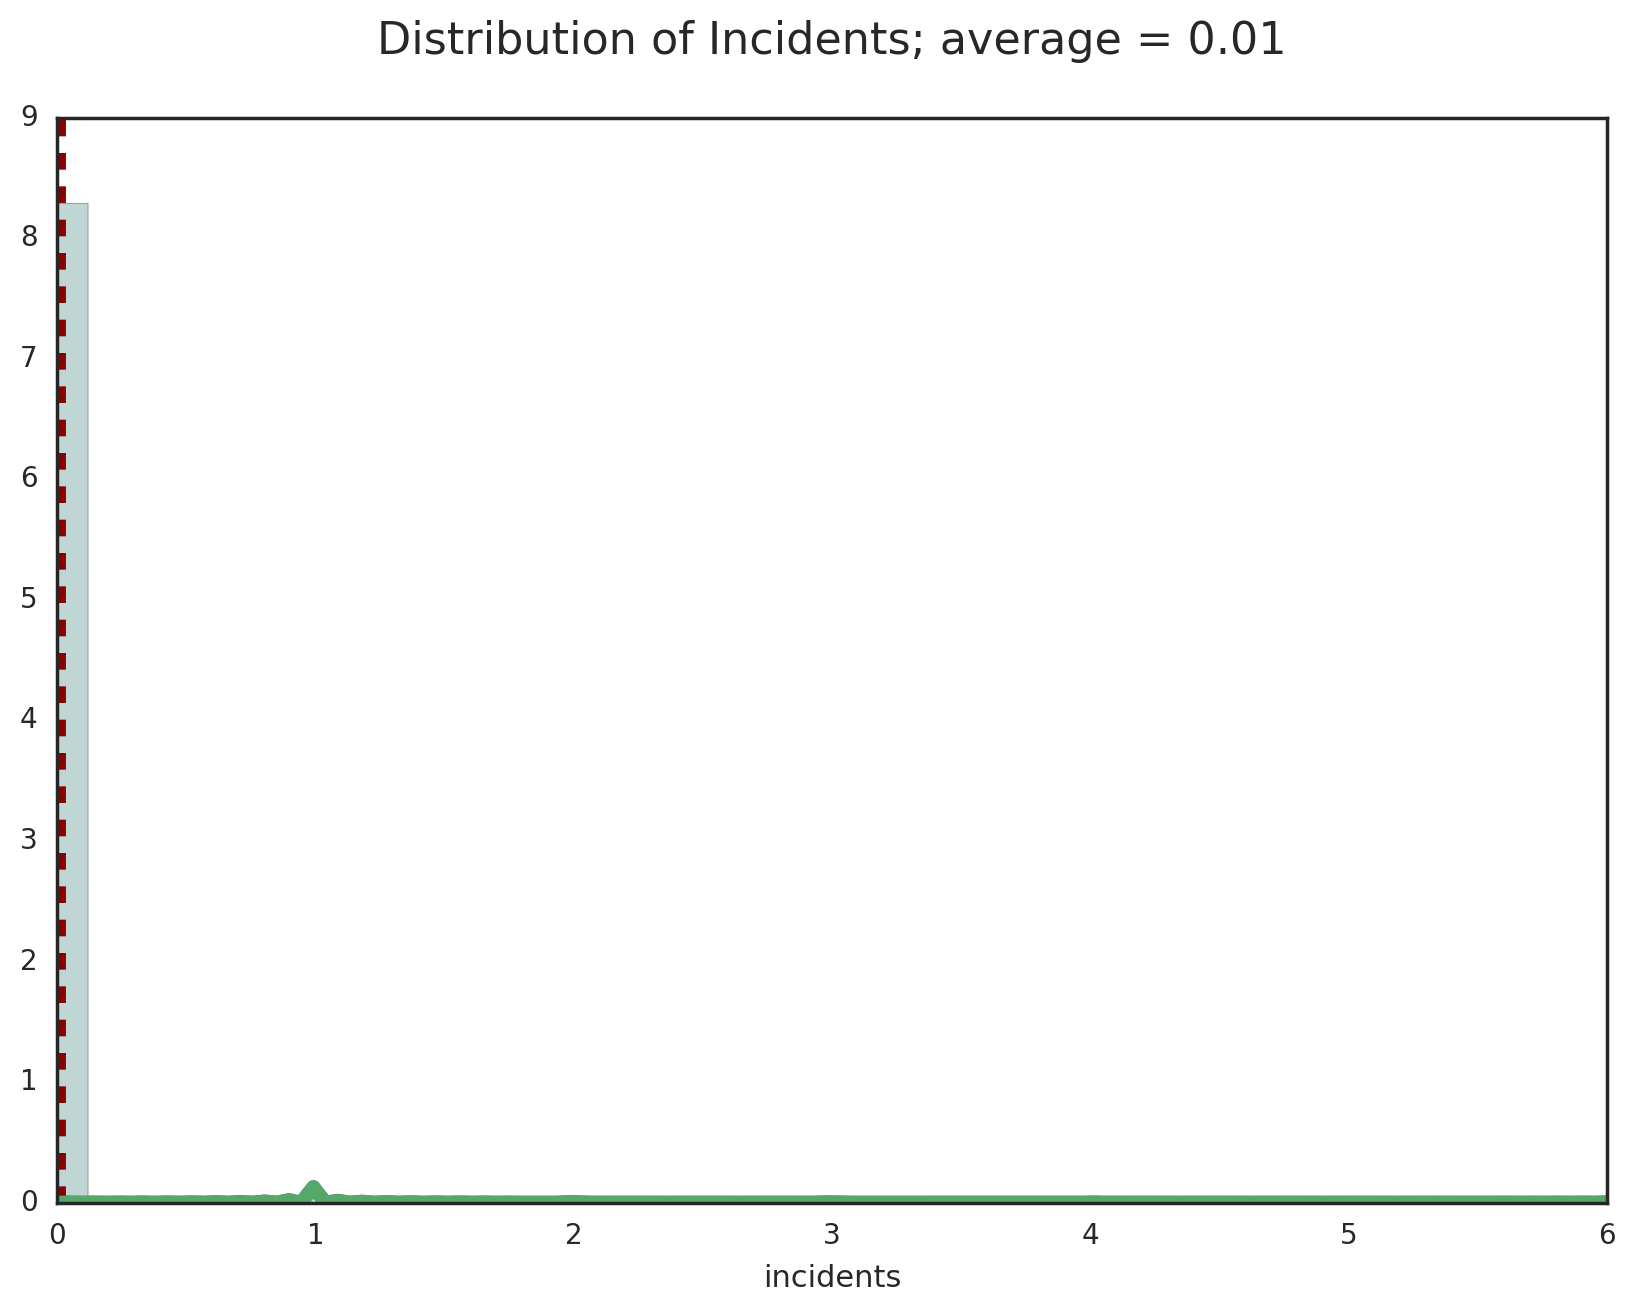

In [11]:
histogram_plotter("Incidents", df.incidents)

In [ ]:
histogram_plotter("Incidents", df.incidents)